<center>
    <h1>Project 2</h1>
    <h2>Photon-matter interaction — Monte Carlo simulation of X-ray imaging</h2>
    <h3>TMA4320 Introduksjon til vitenskapelige beregninger</h3>
</center>

---
In this project we will use the Monte Carlo methods to simulate one-dimensional photon propagation and attenuation. By using this simulation we will study X-ray imaging, which are electromagnetic waves with energies approximately 10 keV to 100 keV. We will study conditions needed to get good contrast as well as minimizing the absorbed dose to reduce unecessary radiation. We will also image two unknown objects using 3D arrays of attenuation coefficients.

#### Comments on implementation

In this project we chose to mostly use functions to make the code more readable and structured as a significant part of the code is repeated througout the project. We are aware that using functions may cause longer runtime, but the difference in runtime between using functions or not were not that significant.

#### Importing libraries

In [1]:
# Matplotlib for plotting
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib notebook
%matplotlib inline

# Numpy for almost everything
import numpy as np

#### Change settings of the figures

In [2]:
# Setting the dpi of the figure to 180 dpi (for better quality)
mpl.rcParams['figure.dpi'] = 180

# Defining some figure parameters
mpl.rcParams.update({'figure.figsize': (11.0, 7.2),                   # Figuresize
                     'legend.fontsize': 17, 'legend.handlelength': 3, # Legend
                     'xtick.labelsize': 15, 'ytick.labelsize': 15,    # Tick-sizes of the axes
                     'font.size': 15,                                 # Fontsize
                     'axes.grid': True,})                             # Enabling gridlines

<center>
    <h1>Problem 1</h1>
    <h2>Implementation of Monte Carlo methods</h2>
</center>

---

In this problem we implement the Monte Carlo methods to simulate the attenuation of photons. We also study the agreement between the number of photons still present at each step and the analytic intensity.

---
## 1.1 Simulation of propagation of photons
#### Implementation of code

We divide the trajectory into discrete steps of step size dx and for each photon we iterate through the steps. We calculate a probability of attenuation for the photon and generate a random number between 0 and 1. If the random number is smaller than the probability, the photon is attenuated. For each step we count how many photons are present, and this is returned as an array.

The function parameter $\mu$ is an array containing a value of attenuation for each step. This opens for spatial variations in the attenuation coefficients. The probability $\mu$$\cdot$dx will therefore be an array containing the probability of attenuation for each step.

In this problem we are given a material with thickness of 10 cm and attenuation coefficient of 0.1 cm<sup>-1</sup>.

#### Defining arrays and variables

In [3]:
t = 10    # [cm], thickness of material
mu = 0.1  # [cm^-1], attenuation coefficient for material 

N = 1000               # Number of steps
x = np.linspace(0,t,N) # Array of steps

#### Creating a function for simulation of photon-attenuation

In [4]:
def photons(N0, N, mu, t): 
    # Function for calculation number of fotons present at each step
    
    # N0 = number of photons to start with
    # N = number of steps
    # mu = attenuation coefficient for material
    # t = thickness of material
    
    num_photons = np.zeros(N) # Creating a list of zeros with size N (number of steps)  
    
    dx = t/N  # Stepsize
    
    p = mu*dx # Probability of attenuation
    
    for i in range(N0):
        random_list = np.random.rand(N) # Create a list with random numbers between 0 and 1
        
        for j in range(N):
            if random_list[j] < p[j]:   # If the random number is smaller than the probability of attenuation
                break                   # Break out of the loop because the photon has been attenuated
            else:
                num_photons[j] += 1     # If the photon has not been attenuated, it is still present 
    
    return num_photons                  # Returns a list with the number of photons at each step 

The photon does not always reach the end of the material. Based on the intensity curve of $\mu$ = 0.1 in figure 2 we see that for a material thickness of 10 cm the intensity decreases by approximately 60%. That means that approximately 60% of the photons have been attenuated throughout the material. This is also apparent in our simulation where approximately 40% of the photons reach the end of the material.

When choosing the step size we have to consider the resulting size of the probability. The probability should be less than 1, which means that $\mu$$\cdot$dx should be less than 1. For example if $\mu$ is changed from 0.1 to 100 and the step size is consistent (dx = 0.01), the probability of attenuation will be 1000 times higher (p = 100$\cdot$0.01 = 1) and therefore all photons will be attenuated. When increasing $\mu$, we also have to decrease the step size in order to get a probability of attenuation between 0 and 1.

## 1.2 Intensity and photon propagation

#### Implementation of code

We wish to see if the number of photons present in the material for each step coincide with the analytic intensity. We therefore plot the number of photons still present in the material together with the analytic intensity for different step size dx and intial number of photons N<sub>0</sub>. For plotting we make a function that plots the analytic intensity together with four different N<sub>0</sub> for a specific dx. 

#### Plotting intensity with photon propagation

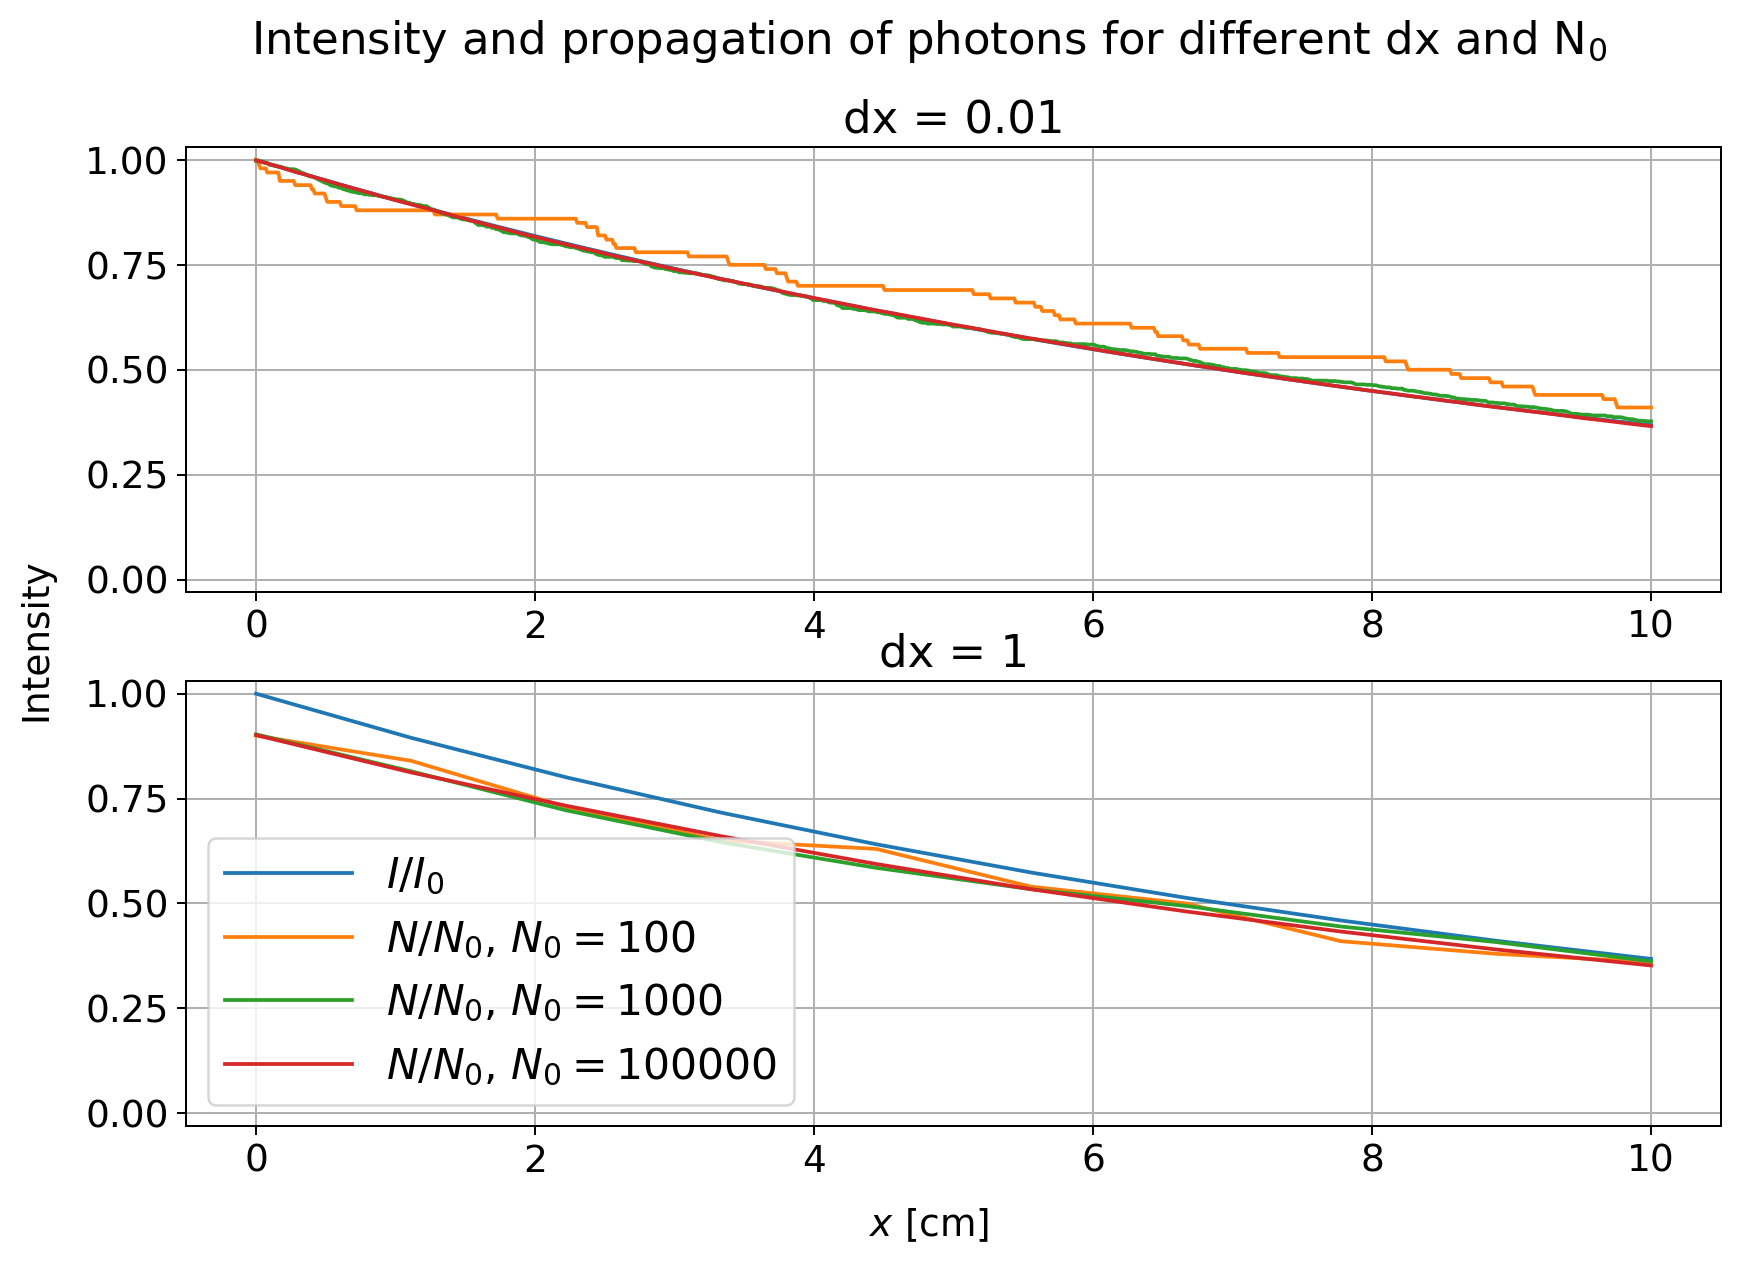

In [5]:
def plot_N0(ax, N):
    # Function for plotting the analytic intensity together with the number of photons still present in the 
    # material as a function of x for different numbers of photons to start with (N0) 
    # and a specific dx (determined by N).
    
    x = np.linspace(0,t,N)     # List of steps
    mu_list = np.ones(N)*mu    # Array containing mu for each step
    analytic_I = np.exp(-mu*x) # Array containing the analytic intensity for each step
    
    ax.plot(x, analytic_I, label="$I/I_0$")
    ax.plot(x, photons(100, N, mu_list, t)/100, label='$N/N_0$, $N_0 = 100$')
    ax.plot(x, photons(1000, N, mu_list, t)/1000, label='$N/N_0$, $N_0 = 1000$')
    ax.plot(x, photons(100000, N, mu_list, t)/100000, label='$N/N_0$, $N_0 = 100000$')
    ax.set_ylim(-0.03,1.03)

# Plot of number of photons and intensity
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Intensity and propagation of photons for different dx and N$_0$')
fig.text(0.5, 0.04, '$x$ [cm]', ha='center')
fig.text(0.04, 0.5, 'Intensity', va='center', rotation='vertical')

plot_N0(ax1, 1000)
ax1.set_title('dx = 0.01')
plot_N0(ax2, 10)
ax2.set_title('dx = 1')

plt.legend()
plt.show()

The figure above shows a plot of the analytic intensity, plotted with the number of photons present at each step for different initial number of photons N<sub>0</sub>, and step size dx. 

We see from the graph for the analytic intensity that for bigger x (deeper into the material), the intensity will decrease. The intensity of the photon beam is proportional to the number of photons. The more the beam penetrates into the material, the more photons are annuated. This leads to a decreasing intensity, and the lines will coincide. The results are therefore as expected.

For dx = 0.01, higher values of N<sub>0</sub> gives better agreement with the analytic intensity, and for N<sub>0</sub> = 100 000 there is almost a perfect agreement between the two graphs. With an increasing step size (dx = 1), the graph for the number of photons will deviate from perfect agreement with the analytic intensity, even for higher N<sub>0</sub>.

<center>
    <h1>Problem 2</h1>
    <h2>Attenuation of photons for two different paths</h2>
</center>

---

In this problem we study attenuation of photons for two different paths, where one is through pure tissue and the other is through tissue with a bone. We also look at the necessary conditions to get good contrast and limit the absorbed dose.

We are given two files, one for each material, consisting of energy-attenuation pairs. Both beams go through 3 cm of matter. The thickness of the bone is 1 cm with 1 cm of tissue at each side. 

---
## 2.1 Opening files and plotting energy-attenuation pairs
#### Implementation of code

To collect the energy-attenuation pairs from the textfiles we create a function that opens the file and splits the energy-attenuation pairs. The function returns two arrays: one containing the energies in keV and the other containing attenuation coefficients in cm<sup>-1</sup>. The two arrays for $\mu$ are then plotted as a function of energy. 

#### Creating function for collecting data

In [6]:
def openFile(filename, rho): 
    # Function for opening and reading a file
    
    # filename = name of the file
    # rho = density of material 
    
    energy = np.array([])     # Creating empty arrays for energies and mu
    mu = np.array([])
    
    f = open(filename, "r")   # Opening file
    line = f.readline()       # Reading a line in the file
    
    while line:               # Reading each line of the file
        line = line.lower().split(",")  # Splitting the line at ", ". 
                                        # lower() turning every letter in to lowercase
    
        energy = np.append(energy, float(line[0]))  # Appending the energy in the energy-array
        mu = np.append(mu, float(line[1]))          # Appending the mu in the mu-array 
    
        line = f.readline()   # Reads the next line    
    f.close()                 # Closing the file after reading 
    
    return energy*1e3, mu*rho # Returns two arrays: energy in keV and mu in cm^-1

#### Plotting energy-attenuation pairs

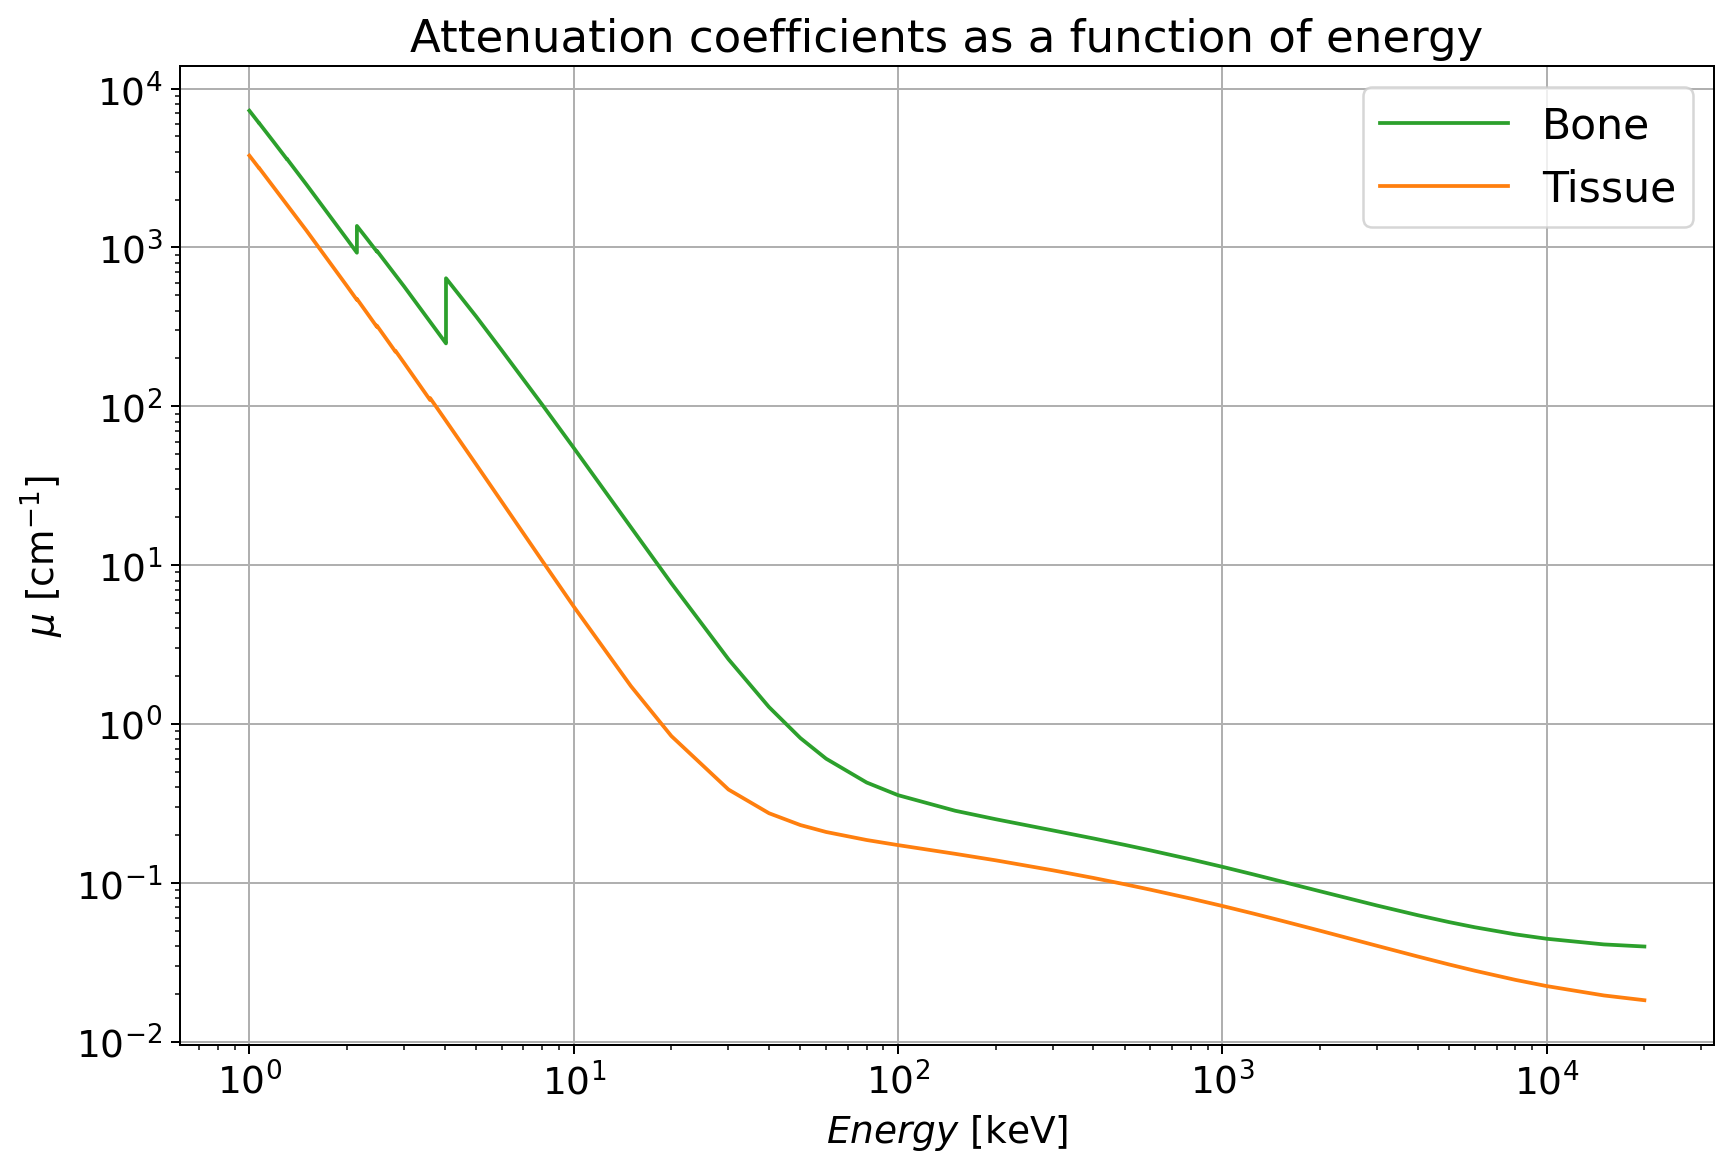

In [7]:
energy_bone, mu_bone = openFile("bone.txt", 1.92)       # Opening file "bone.txt" 
energy_tissue, mu_tissue = openFile("tissue.txt", 1.02) # Opening file "tissue.txt" 


# Plotting the attenuation coefficients as a function of energy on a logaritmic scale
plt.figure()
plt.plot(energy_bone, mu_bone, label='Bone', color='tab:green')
plt.plot(energy_tissue, mu_tissue, label='Tissue', color='tab:orange')
plt.title("Attenuation coefficients as a function of energy")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$Energy$ [keV]')
plt.ylabel('$\mu$ [cm$^{-1}$]')
plt.legend()
plt.show()

Plot of attenuation coefficients $\mu$ as a function of energy for bone and tissue. The graphs decrease at a similar rate and the coefficients for bone are higher. For lower energies, the coefficients for bone are uneven.

## 2.2 Intensity of the two beams

#### Implementation of code
We adjust the energy- and $\mu$-arrays so they only contain values for energies between 10 and 100 keV. In this interval, the energies for tissue and bone are equal, thus only one array is needed for the energy.

For the spatial variations of $\mu$ for beam 2, we make a function that creates an array with different $\mu$ values for each step. The intensities for both of the beams are calculated and plotted as a function of time. The contrast is calculated and plotted as a function of energy by the given formula. The first value of the intensity for the two beams are removed as the first value for beam 1 is zero. This is to avoid dividing by zero.

To find the number of photons needed to get an intensity of 10 MeV, we first calculate the number of photons needed to hit the detector. We then test with different initial number of photons, increasing this number each time until we get the desired amount. The start value is set to be the number of photons needed to hit the detector. When the desired amount is achieved, we calculate the intensity for both beams as a function of energy.

The intensities and number of photons required are plotted as a function of energy. The first two values are removed when plotting because the number of photons hitting the detector do not reach the treshold of intensity I<sub>1</sub> = 10 MeV.

Using the required number of photons for each energy, the dose for each step is calculated. The total dose for each beam is calculated by adding the doses for each step. The total dose is plotted as a function of energy. To easier see what energy range should be used to obtain both good contrast and low dose, the contrast and dose are plotted together.

#### Collecting data in the given energy interval

In [8]:
new_energy_tissue = np.array([])    # Creating empty arrays
new_mu_tissue = np.array([])
new_mu_bone = np.array([])

for i in range(len(energy_tissue)): # Iterating through every energy-value
    if energy_tissue[i] >= 1e1 and energy_tissue[i] <= 1e2: # Checking if the energy is in the intervall
        
        # If the energy is in the interval, the given energy-attenuation-pairs is appended in the arrays
        new_mu_bone = np.append(new_mu_bone, mu_bone[i]) 
        new_mu_tissue = np.append(new_mu_tissue, mu_tissue[i])
        new_energy_tissue = np.append(new_energy_tissue, energy_tissue[i])

# new_energy_tissue now containts energies between 10keV and 100keV and new_mu_tissue/bone 
# contains the corresponding attanuation coefficients

# Given the arrays general names
energy = new_energy_tissue
mu_tissue = new_mu_tissue
mu_bone = new_mu_bone

#### Defining variables

In [9]:
t = 3                   # [cm], thickness
N = 300                 # Number of steps
N0 = 10000              # Number of initial photons
dx = t/N0               # Step size

#### Calculating intensity for the two beams

In [10]:
def mu_list_I2(N, mu_tissue, mu_bone):
    # This functions is returns an array containing the spatial variations of mu for beam I2
    
    # N = number of steps
    # mu_tissue = attenuation coefficient tissue for spesific energy
    # mu_bone = attenuation coefficient bone for spesific energy
        
    mu_bone_list = np.ones(int(N/3))*mu_bone      # Create array of size N/3 where every element has the value mu_bone
    mu_tissue_list = np.ones(int(N/3))*mu_tissue  # Create array of size N/3 where every element has the value mu_tissue
    
    # Append the different arrays in correct order:
    mu = np.array([*mu_tissue_list, *mu_bone_list, *mu_tissue_list])
    
    return mu          # Returning mu array


# Create array for the intensities from beam 1 and 2 for each energy:
I1 = np.zeros(len(energy))
I2 = np.zeros(len(energy))

for i in range(len(energy)):
    mu_I1 = np.ones(N)*mu_tissue[i]                   # Array containing mu for each step in each beam 
    mu_I2 = mu_list_I2(N, mu_tissue[i], mu_bone[i])   
    
    I1[i] = energy[i]*photons(N0, N, mu_I1, t)[-1]    # Calculate the intensity for each beam
    I2[i] = energy[i]*photons(N0, N, mu_I2, t)[-1]

#### Plotting the resulting intensities as a function of energy

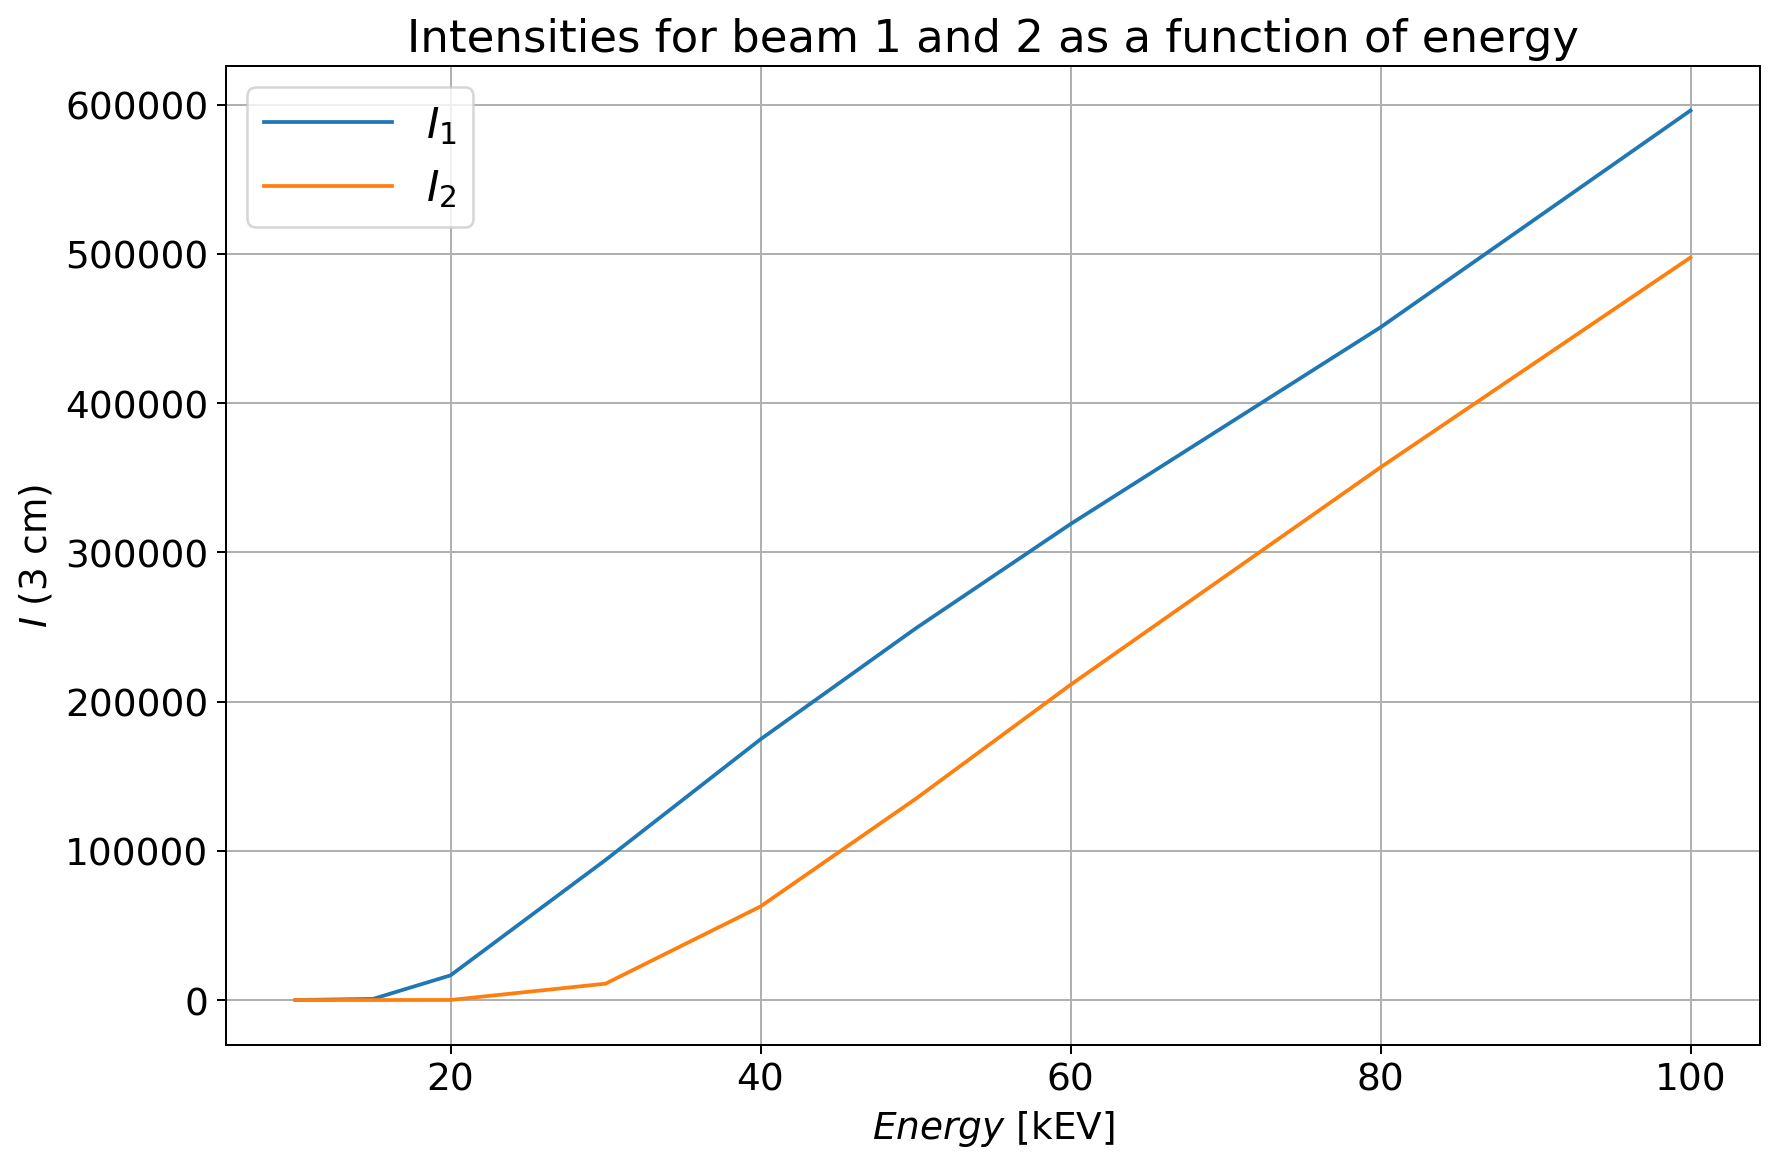

In [11]:
plt.figure()
plt.plot(energy, I1, label="$I_1$")
plt.plot(energy, I2, label="$I_2$")
plt.xlabel("$Energy$ [kEV]")
plt.ylabel("$I$ (3 cm)")
plt.title('Intensities for beam 1 and 2 as a function of energy')
plt.legend()
plt.show()

#### Calculating and plotting the contrast as a function of energy

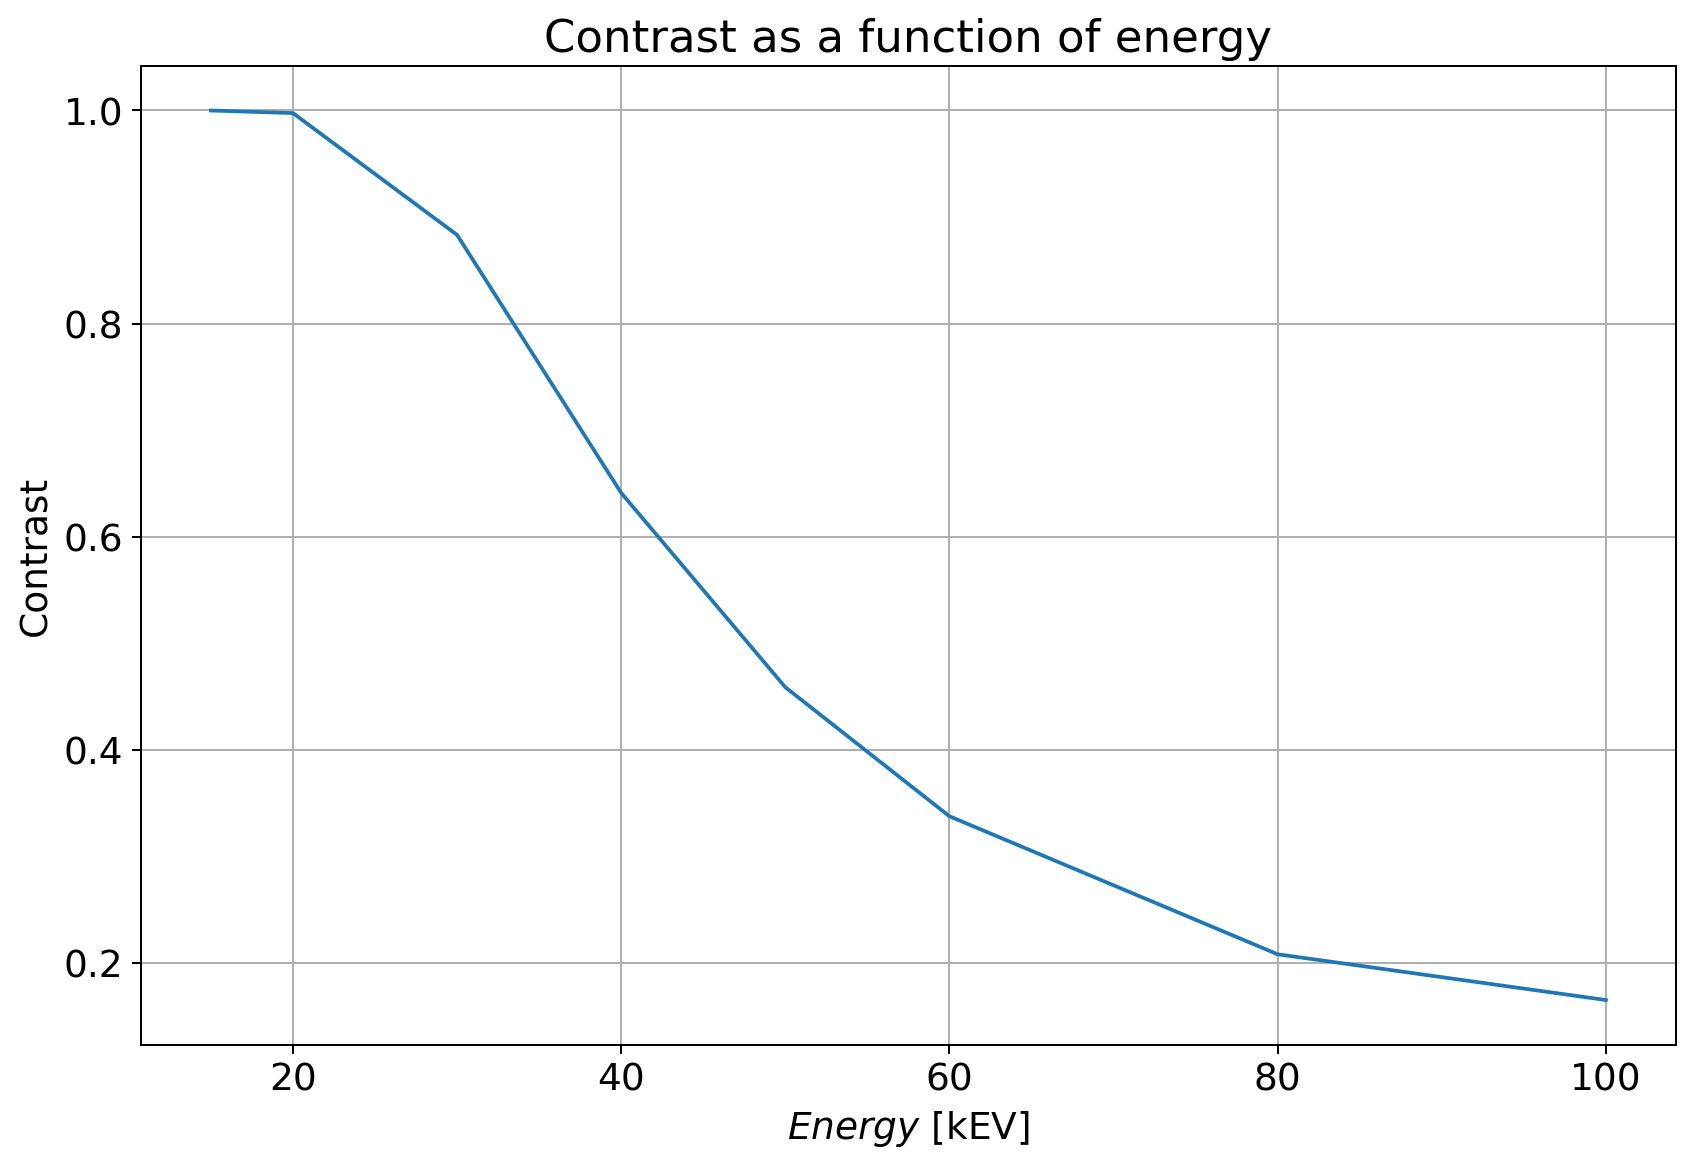

In [12]:
I1 = np.delete(I1, 0) # To avoid dividing by zero, the first element is removed
I2 = np.delete(I2, 0)

C = (I1 - I2)/I1      # Formula for the contrast

# Plot the contrast as a function of energy
plt.figure()
plt.plot(np.delete(energy, 0), C, label="Contrast")
plt.xlabel("$Energy$ [kEV]")
plt.ylabel("Contrast")
plt.title('Contrast as a function of energy')
plt.show()

The lowest energies give the highest contrast. If a high contrast is wanted, lower energies will give the best contrast.

In [13]:
I1 = np.zeros(len(energy))                         # Create array for intensities
I2 = np.zeros(len(energy))
num_photons_source_list = np.zeros(len(energy))    # Create array for number of photons required

for i in range(len(energy)):
    num_photons_out = 0                            # Start value for number of photons out
    num_photons_out_desired = int(10000/energy[i]) # Number of photons needed
    N0_start = num_photons_out_desired             # Start value for number of photons in
    
    mu_I1 = np.ones(N)*mu_tissue[i]
    mu_I2 = mu_list_I2(N, mu_tissue[i], mu_bone[i])
    
    while num_photons_out < num_photons_out_desired:
        N0_start = N0_start+10                               # Increase number of photons to start with
        num_photons_out = photons(N0_start, N, mu_I1, t)[-1] # Generate number of photons out for beam 1
                
        if N0_start > 10000:                                 # Prevent an infinite loop.
            break
    
    I1[i] = num_photons_out * energy[i]                      # Calculate intensity for beam 1
    I2[i] = photons(N0_start, N, mu_I2, t)[-1] * energy[i]   # Calculate intensity for beam 2
    
    num_photons_source_list[i] = N0_start                    # Collect the number of photons required

#### Plotting the intensities for the two beams as a function of energy

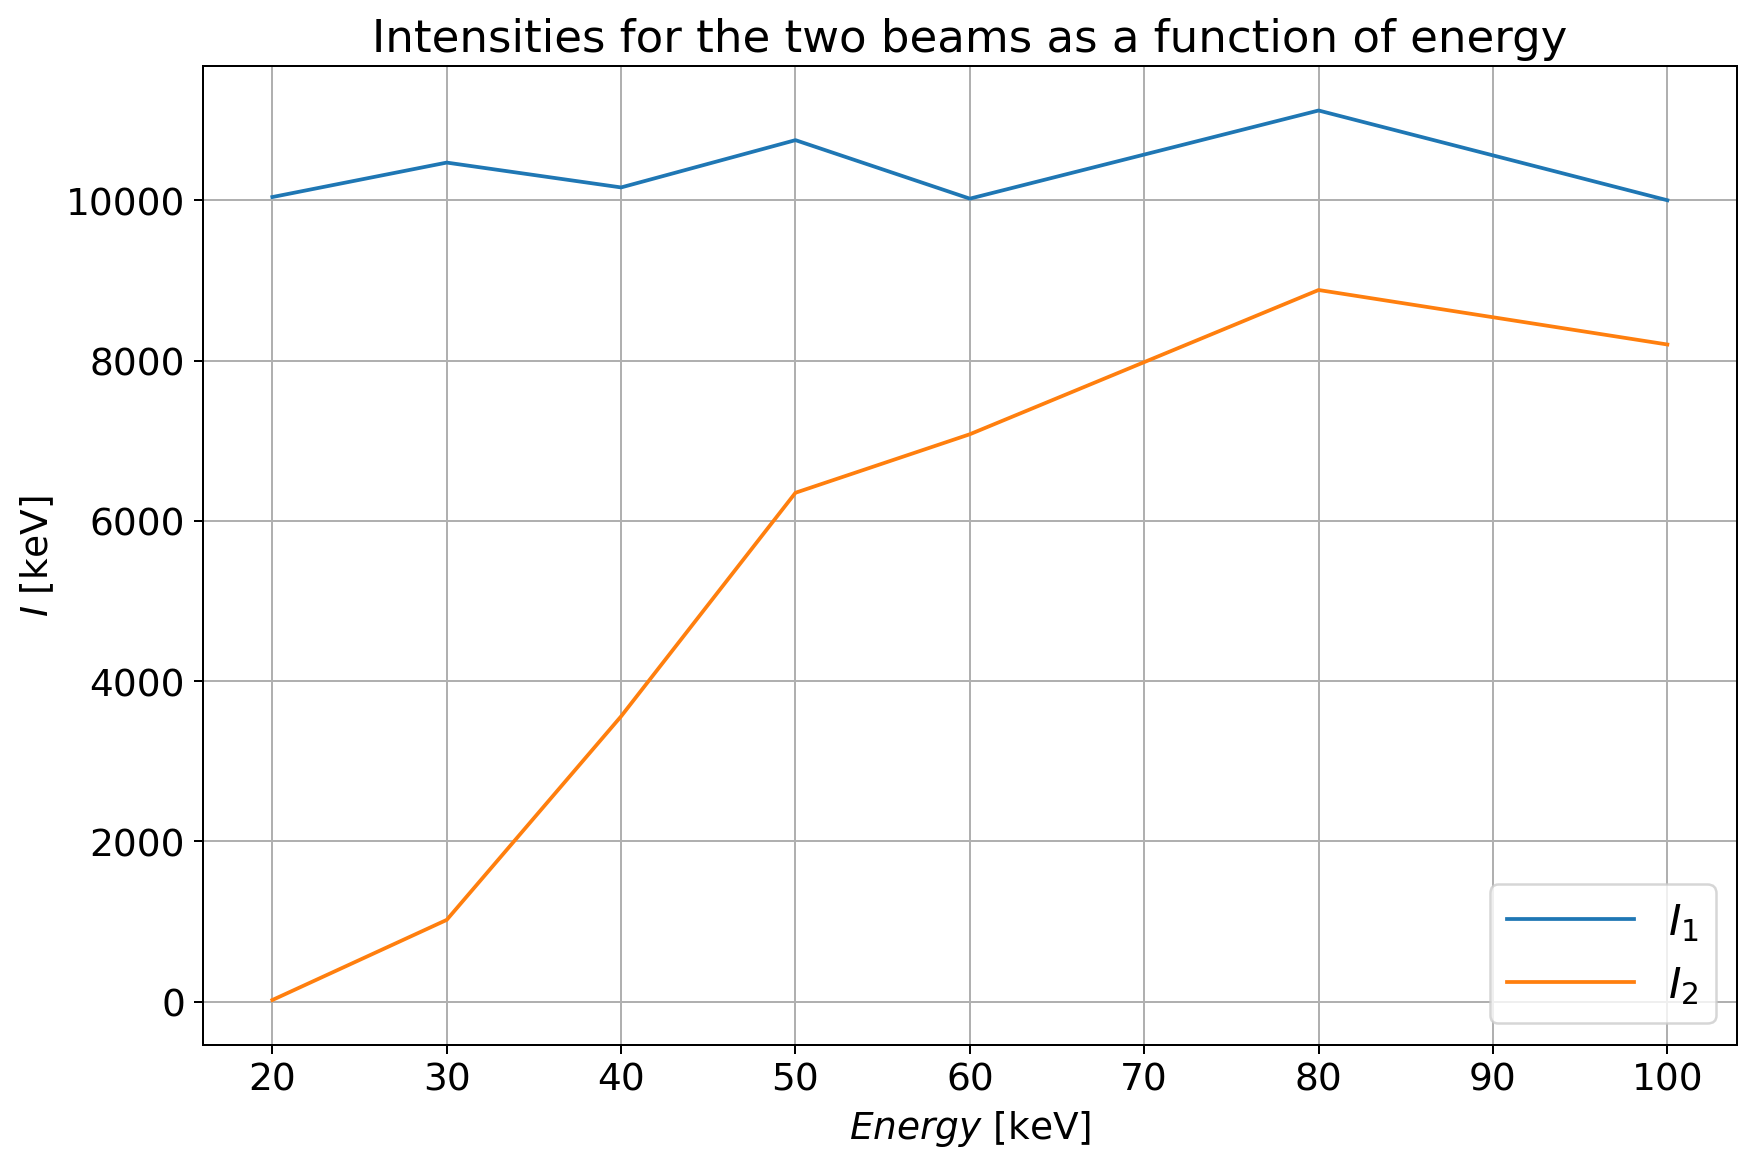

In [14]:
# Remove the two first values when plotting as they do not reach the treshold of I1 = 10 MeV   
plt.figure()
plt.plot(np.delete(energy,[0,1]), np.delete(I1, [0,1]), label="$I_1$")
plt.plot(np.delete(energy,[0,1]), np.delete(I2, [0,1]), label="$I_2$")
plt.xlabel("$Energy$ [keV]")
plt.ylabel("$I$ [keV]")
plt.title('Intensities for the two beams as a function of energy')
plt.legend()
plt.show()

The figure above shows graphs of the intensities. The graph for the first intensity is approximately constant, which was expected, but will vary slighty because of the randomness in the Monte Carlo methods. The graph for the second intensity increases with the energy.

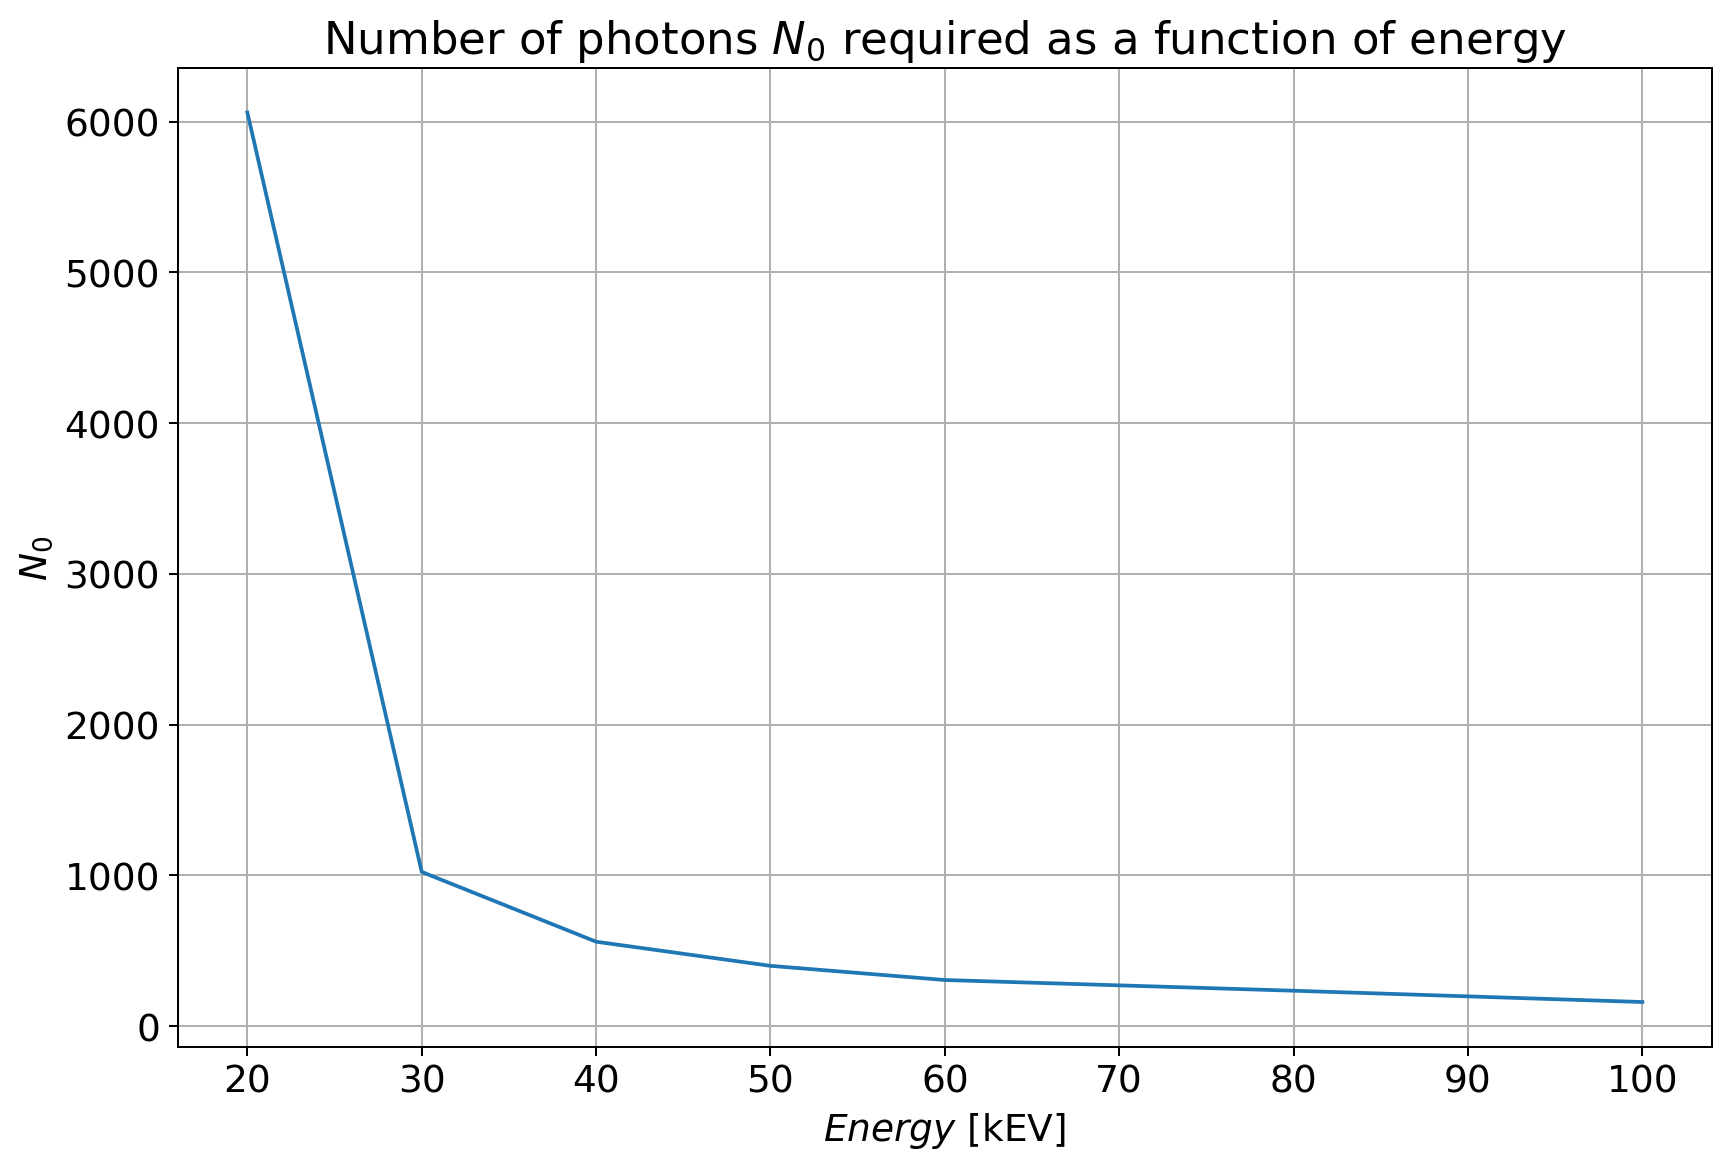

In [15]:
# Plot the number of photons N0 required as a function of energy
plt.figure()
plt.title("Number of photons $N_0$ required as a function of energy")
plt.plot(np.delete(energy, [0,1]), np.delete(num_photons_source_list, [0,1]))
plt.xlabel("$Energy$ [kEV]")
plt.ylabel("$N_0$")
plt.show()

The number of photons required to be emitted from the source in order to achieve the intensity of 10 MeV decreases with energy. This is because for higher energies, less photons are required to achieve the same intensity.

#### Total absorbed dose

In [16]:
rho_tissue = 1.02  # [g/cm^3], density of tissue
rho_bone = 1.92    # [g/cm^3], density of bone

total_dose_I1 = np.zeros(len(energy))  # Creating arrays for doses for each beam
total_dose_I2 = np.zeros(len(energy))

# rho-array for beam 2
rho_bone_list = np.ones(int(N/3))*rho_bone      # Array of size N/3 with values rho_bone
rho_tissue_list = np.ones(int(N/3))*rho_tissue  # Array of size N/3 with values rho_tissue
    
rho_I2 = np.array([*rho_tissue_list, *rho_bone_list, *rho_tissue_list])  # Array containing density in correct order


# Intensity I1
for i in range(len(energy)):
    mu = np.ones(N)*mu_tissue[i]
    num_photons_list = photons(int(num_photons_source_list[i]), N, mu, t) # Propagation of photons with given N0
    
    for j in range(len(num_photons_list)-1):
        N_att = num_photons_list[j] - num_photons_list[j+1]  # Attenuated photons in each step
        dose = N_att*energy[i]/(dx*rho_tissue)               # Absorbed dose in the given step
        total_dose_I1[i] += dose                             # Absorbed dose added to total dose
        
# Intensity I2
for i in range(len(energy)):
    mu = mu_list_I2(N, mu_tissue[i], mu_bone[i])
    num_photons_list = photons(int(num_photons_source_list[i]), N, mu, t) # Propagation of photons with given N0
    
    for j in range(len(num_photons_list)-1):
        N_att = num_photons_list[j] - num_photons_list[j+1]  # Attenuated photons in each step
        dose = N_att*energy[i]/(dx*rho_I2[j])                # Absorbed dose in the given step
        total_dose_I2[i] += dose                             # Absorbed dose added to total dose

total_dose = total_dose_I1 + total_dose_I2                   # Total dose along both beams

#### Plot of contrast and dose

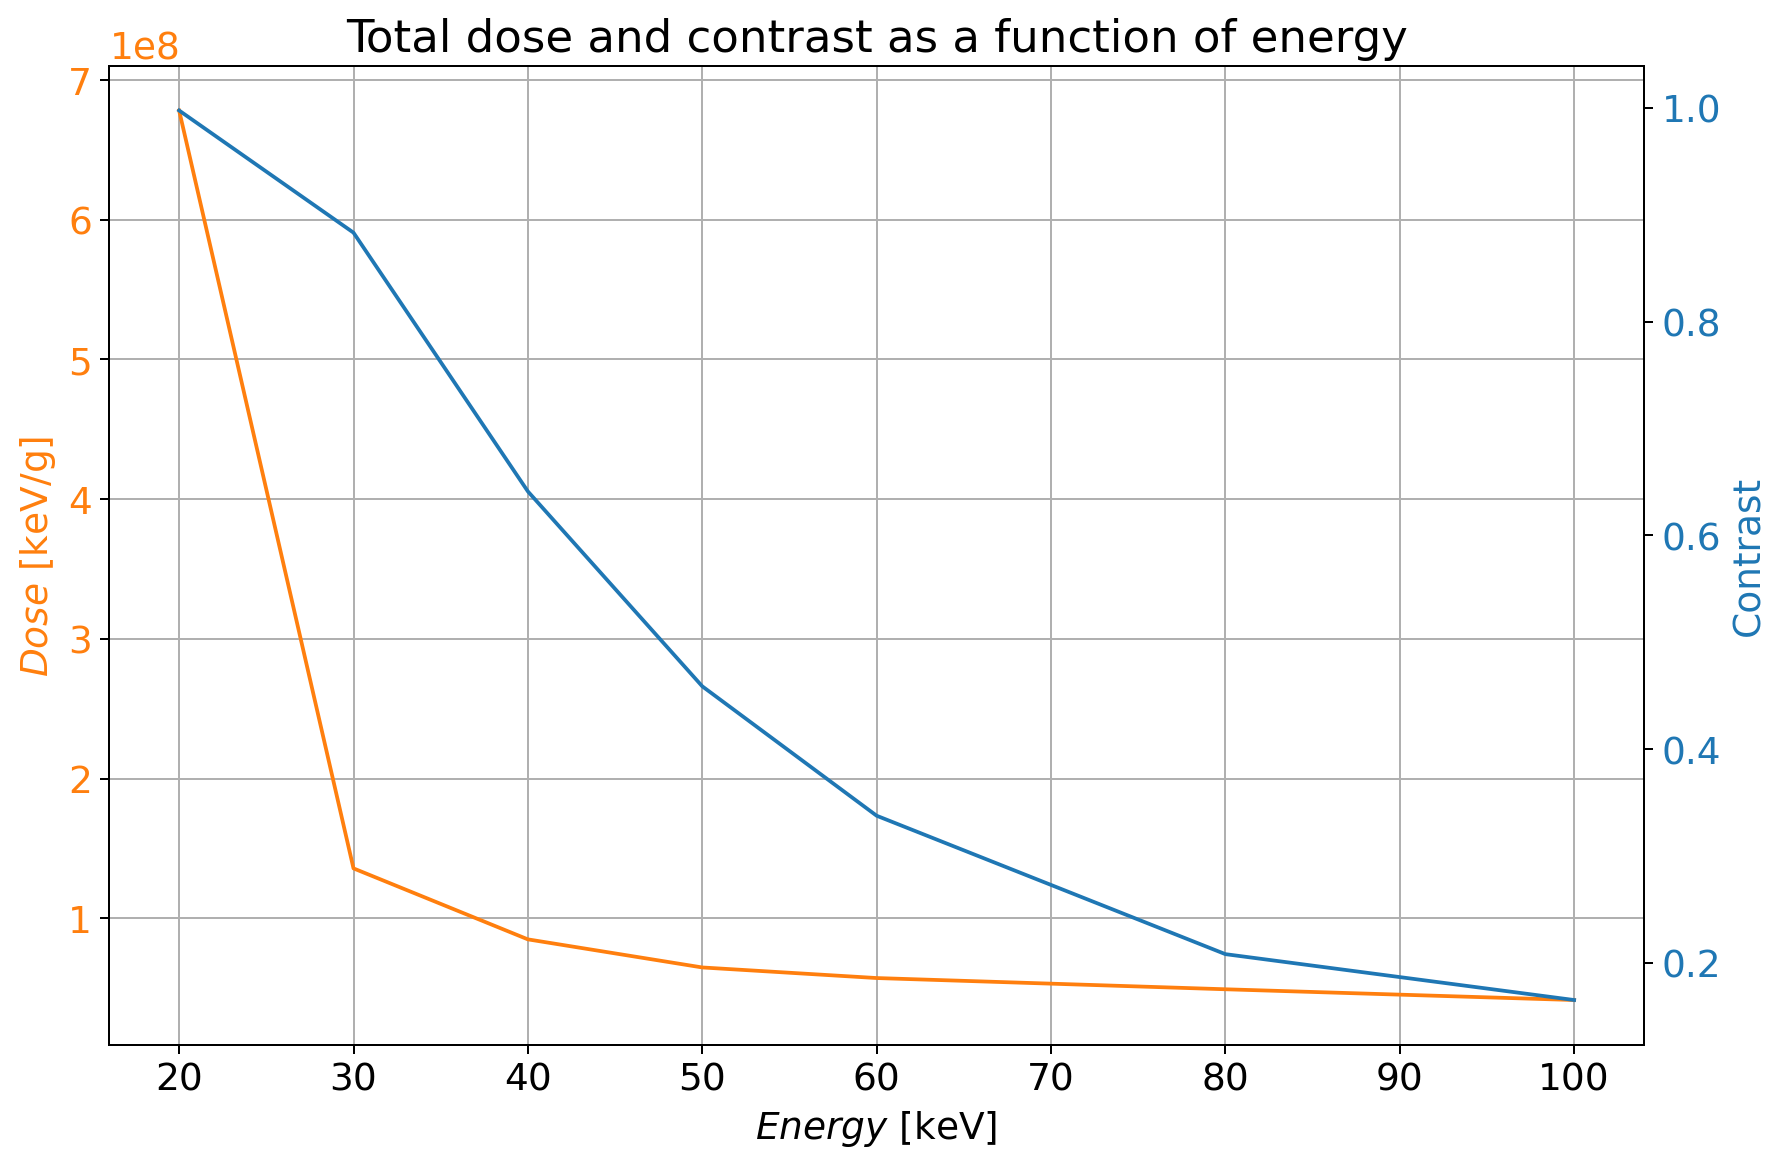

In [17]:
fig, ax1 = plt.subplots()

# Plot of total dose
color='tab:orange'
ax1.set_xlabel('$Energy $ [keV]')
ax1.set_ylabel('$Dose$ [keV/g]', color=color)
ax1.plot(np.delete(energy,[0,1]), np.delete(total_dose,[0,1]), color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot of contrast
ax2 = ax1.twinx()      # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Contrast', color=color)  # we already handled the x-label with ax1
ax2.plot(np.delete(energy,[0,1]), np.delete(C,0), color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.grid(axis='both')
plt.title("Total dose and contrast as a function of energy")

plt.show()

From this figure it seems like energies between 30 keV and 40 keV can be used to obtain both high contrast and a low dose. 

<center>
    <h1>Problem 3</h1>
    <h2>X-ray imaging of 3D object</h2>
</center>

---

## 3.1 3D-arrays

In this problem we image unknown 3D objects using 3D arrays of attenution coefficients. The data are given in different files for each object and energy. When imaging the objects for a specific energy, we look at the objects in each dimension. This gives three images of each object per energy.

#### Implementation of code
Using a built in numpy-function "numpy.load", the attenuation coefficients are obtained from the files.

For each dimension we create functions that calculates the output intensity. We iterate through the 3D array to obtain coefficients for each dimension. The coefficients are used to calculate the intensity.

The function "plot_object" is made to easily create the images of each object with the given energy. A built-in matplotlib function "pyplot.imshow" is used to image the intensities. The images for object 2 were rotated so a similar function "plot_tobject" was made to image the object, but rotated to our preference.

#### Loading files

In [18]:
object1_20 = np.load("object1_20keV.npy")
object1_50 = np.load("object1_50keV.npy")
object1_100 = np.load("object1_100keV.npy")

object2_25 = np.load("object2_25keV.npy")
object2_50 = np.load("object2_50keV.npy")
object2_75 = np.load("object2_75keV.npy")

#### Propagation along yz-, xz- and xy-plane 

In [19]:
#Propagation through yz-plane
def I_x(E, mu, t):
    I_matrix_x = np.zeros(shape=(N_y,N_z))
    
    # Iterate through each plane to collect the attenuation coefficients:
    for i in range(N_y):
        for j in range(N_z):
            mu_list = mu[:,i,j]    
        
            # Calculating intensity in x-direction:
            num_photons = photons(N0, N_x, mu_list, t)[-1]
            I = E*num_photons
            I_matrix_x[i,j] = I
    
    return I_matrix_x

#Propagation through xz-plane
def I_y(E, mu, t):
    I_matrix_y = np.zeros(shape=(N_x,N_z))
    
    # Iterate through each plane to collect the attenuation coefficients:
    for i in range(N_x):
        for j in range(N_z):
            mu_list = mu[i,:,j]
            
            # Calculating intensity in y-direction:
            num_photons = photons(N0, N_y, mu_list, t)[-1]
            I = E*num_photons
            I_matrix_y[i,j] = I
    
    return I_matrix_y

#Propagation through xy-plane
def I_z(E, mu, t):
    I_matrix_z = np.zeros(shape=(N_x,N_y))

    # Iterate through each plane to collect the attenuation coefficients:
    for i in range(N_x):
        for j in range(N_y):
            mu_list = mu[i,j,:]
            
            # Calculating intensity in z-direction:
            num_photons = photons(N0, N_z, mu_list, t)[-1]
            I = E*num_photons
            I_matrix_z[i,j] = I
            
    return I_matrix_z

#### Function for imaging object

In [20]:
# New set of parameters for the figure size 
mpl.rcParams.update({'figure.figsize': (11.0, 3.5),
                     'axes.grid': False}) 

# Function for plotting the images of the object
def plot_object(E, mu, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.suptitle(title)
    ax1.imshow(I_x(E, mu, t_x))
    ax2.imshow(I_y(E, mu, t_y))
    ax3.imshow(I_z(E, mu, t_z))
    
    for ax in (ax1, ax2, ax3):
        ax.set_xticks([])
        ax.set_yticks([])

# Similar function as above, but plots the transposed image of the object
def plot_tobject(E, mu, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    fig.suptitle(title)
    ax1.imshow(np.transpose(I_x(E, mu, t_x)))
    ax2.imshow(np.transpose(I_y(E, mu, t_y)))
    ax3.imshow(np.transpose(I_z(E, mu, t_z)))
    
    for ax in (ax1, ax2, ax3):
        ax.set_xticks([])
        ax.set_yticks([])

## 3.2 Imaging a 3D-object

#### Implementation of code

The number of steps and thickness for each dimension are defined. These values are used in the function, implemented in 3.1, for imaging each object.

#### Defining variables

In [21]:
N0 = 500
N_x = 13
N_y = 128
N_z = 128

t_x = 6.5
t_y = 44.6
t_z = 44.6

#### Imaging object 1 for different energies

In [ ]:
# Object 1, Energy: 20 kEv
plot_object(20, object1_20, 'Image of object 1, Energy: 20 keV')
# Object 1, Energy: 50 kEv
plot_object(50, object1_50, 'Image of object 1, Energy: 50 keV')
# Object 1, Energy: 100 kEv
plot_object(100, object1_100, 'Image of object 1, Energy: 100 keV')

The images shows that for higher energy there is lower contrast, as found in problem 2. We wish to find the right amount of energy to get the details as well as a decent amount of contrast. When we look at the dark part of the image, the details are clearer for higher energies. This is not the case for the bright part, where the details seem to disappear for higher energies because of the low contrast. The energy required to get the best image therefore depends on what you are trying to image.

By looking at the three different images we see that 50 keV gives both a detailed and well contrasted image for this object. We conclude with this being an image of a cross section of a knee. We can see the shape of the articular cartiage in the middle.

#### Defining variables

In [ ]:
N0 = 500
N_x = 60
N_y = 60
N_z = 50

t_x = 12
t_y = 12
t_z = 10

#### Imaging object 2 for different energies

In [ ]:
# Object 2, Energy: 25 kEv
plot_tobject(25, object2_25, 'Image of object 2, Energy: 25 keV')
# Object 2, Energy: 50 kEv
plot_tobject(50, object2_50, 'Image of object 2, Energy: 50 keV')
# Object 2, Energy: 75 kEv
plot_tobject(75, object2_75, 'Image of object 2, Energy: 75 keV')

For the energy of 25 keV we see that the object is a cup, but we barely notice anything else. For 50 keV we can see clearer that the cup is filled with something, and even see the handle on the other side of the cup from the front. For 75 keV these details are even clearer.

It seems that an energy of 75 keV is a right amount of energy to get the information needed. The low contrast makes it easier to see the important aspects of the image, such as the 3D property of the object. We conclude with this being an image of a cup filled with something.

<center>
    <h1>Conclusion</h1>
</center>

---

In this project we have looked at a Monte Carlo simulation of X-ray imaging. We simulated a one-dimensional propagation of N photons using the randomness of the Monte Carlo method. In the simulation, approximately 60% of the photons were attenuated in the material, which coincides with figure 2. When choosing step size for the propagation the resulting probability should be less than one. Therefore, when increasing the step size, the attenuation coefficient has to be reduced in order to obtain this probability. When plotting the analytic intensity of the photon beam together with the number of photons present in each step, we see that both decreases with x. This is because more photons will be attenuated throughout the material and therefore there are less photons to contribute with energy to the intensity. We also notice a change for different step sizes and initial number of photons. With a step size of 0.01 the number of photons present in each step will coincide with the analytic curve for N approximately 100 000. Increasing the step size from 0.01 to 1, the number of photons in each step does not coincide with the analytic intensity, even for higher N. 

By looking at two different paths through a material we can study the necessary conditions to get both high contrast and limiting the absorbed dose. When plotting the dose and constrast for the two photon beams we see that lower energies give the highest contrast but also the highest dose. It still seems that energies between 30 keV and 40 keV can be used to obtain both high contrast and a low dose. 

Simulating the attenuation of photons allows us to study X-ray imaging of objects. When imaging the objects we wish to find the right amount of energy to get details as well as a decent amount of contrast. For object 1 we observed that different energies made different parts of the object more detailed, thus an energy of 50 keV gives a detailed and well contrasted image. The object seems to be a cross section of a knee. For object 2 it seems to be more important to capture the 3D aspect of the object. The highest energy of 75 keV showed the 3D property in the best way. The second object seems to be a cup filled with something. From this we can conclude that the same amount of energy is not suitable for every object, and it depends on how complex the object is and how many details are wanted. 